## Cooperation and the iterated prisoner's dilemma

As we discussed in lecture, there is no one best strategy for playing an iterated prisoner's dilemma (IPD).  

In this notebook, we'll use the [axelrod](https://axelrod.readthedocs.io/en/stable/index.html) package to replicate an Axelrod-style tournament in which different strategies for playing the IPD are pitted against one another.

In [16]:
# You will likely have to install the axelrod package; the line below
# will do that
#!pip install axelrod

In [17]:
from IPython.core.display import HTML

import matplotlib
from matplotlib import animation as animation
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('fivethirtyeight')

import networkx as nx
import axelrod as axl

# suppress annoying matplotlib warnings
import warnings
warnings.filterwarnings("ignore")

We'll start by looking at several strategies:

* **Cooperator** - always cooperates
* **Defector** - always defects
* **Tit-For-Tat (TFT)** - start by cooperating, then mimic opponent's previous action
* **Alternator** - alternates between cooperation and defection
* **Random** - picks a random action

In [18]:
# these are the strategies used in Axelrod's first tournament
# (see https://axelrod.readthedocs.io/en/stable/tutorials/running_axelrods_first_tournament/index.html)
players = [s() for s in axl.axelrod_first_strategies]
players

[Tit For Tat,
 First by Tideman and Chieruzzi: (D, D),
 First by Nydegger,
 First by Grofman,
 First by Shubik,
 First by Stein and Rapoport: 0.05: (D, D),
 Grudger,
 First by Davis: 10,
 First by Graaskamp: 0.05,
 First by Downing,
 First by Feld: 1.0, 0.5, 200,
 First by Joss: 0.9,
 First by Tullock,
 First by Anonymous,
 Random: 0.5]

In [19]:
# here's another set you can play with - there are tons in the package
# (and you can write your own if you are really interested)
#players = [axl.Cooperator(),
#           axl.Defector(),
#           axl.TitForTat(),
#           axl.Alternator(),
#           axl.FirstByDowning(),
#           axl.Random()
#          ]
#players

We can look at a description of each strategy using its docstring:

In [20]:
print(axl.Cooperator.__doc__)

A player who only ever cooperates.

    Names:

    - Cooperator: [Axelrod1984]_
    - ALLC: [Press2012]_
    - Always cooperate: [Mittal2009]_
    


Now we'll set up a tournament.
See the [Axelrod tutorial](https://axelrod.readthedocs.io/en/stable/tutorials/running_axelrods_first_tournament/index.html).

We'll have players play iterated prisoner's dilemmas that have 2000 iterations per match; we'll repeat each pairing 5 times.

In [21]:
tournament1 = axl.Tournament(players,
                             turns=200,
                             repetitions=5,
                             # note that if you choose a different seed, Tit for Tat may not win!
                             seed=1408)

Let's run the tournament

In [22]:
results1 = tournament1.play()
results1.ranked_names

Analysing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 272.24it/s]


['Tit For Tat',
 'First by Stein and Rapoport: 0.05: (D, D)',
 'First by Grofman',
 'First by Shubik',
 'First by Tideman and Chieruzzi: (D, D)',
 'First by Nydegger',
 'Grudger',
 'First by Davis: 10',
 'First by Graaskamp: 0.05',
 'First by Downing',
 'First by Feld: 1.0, 0.5, 200',
 'First by Tullock',
 'First by Joss: 0.9',
 'First by Anonymous',
 'Random: 0.5']

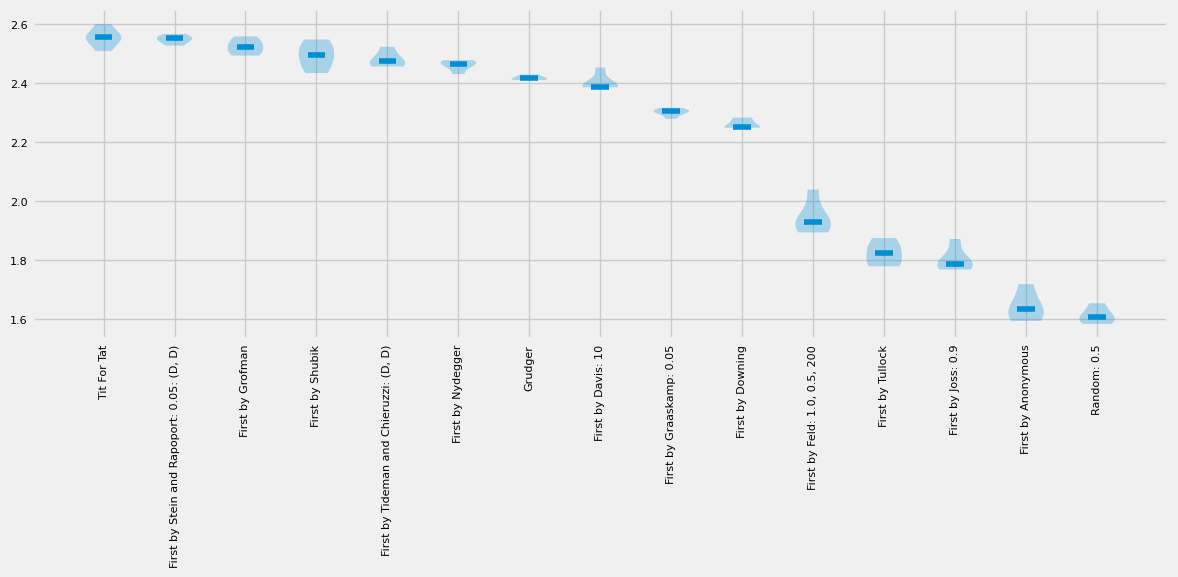

In [23]:
plot = axl.Plot(results1)
p = plot.boxplot()
p.show();

We can also look at how well the different strategies fared against one another.  
(Higher scores/brighter colors indicate that the row strategy did better than the column strategy.)

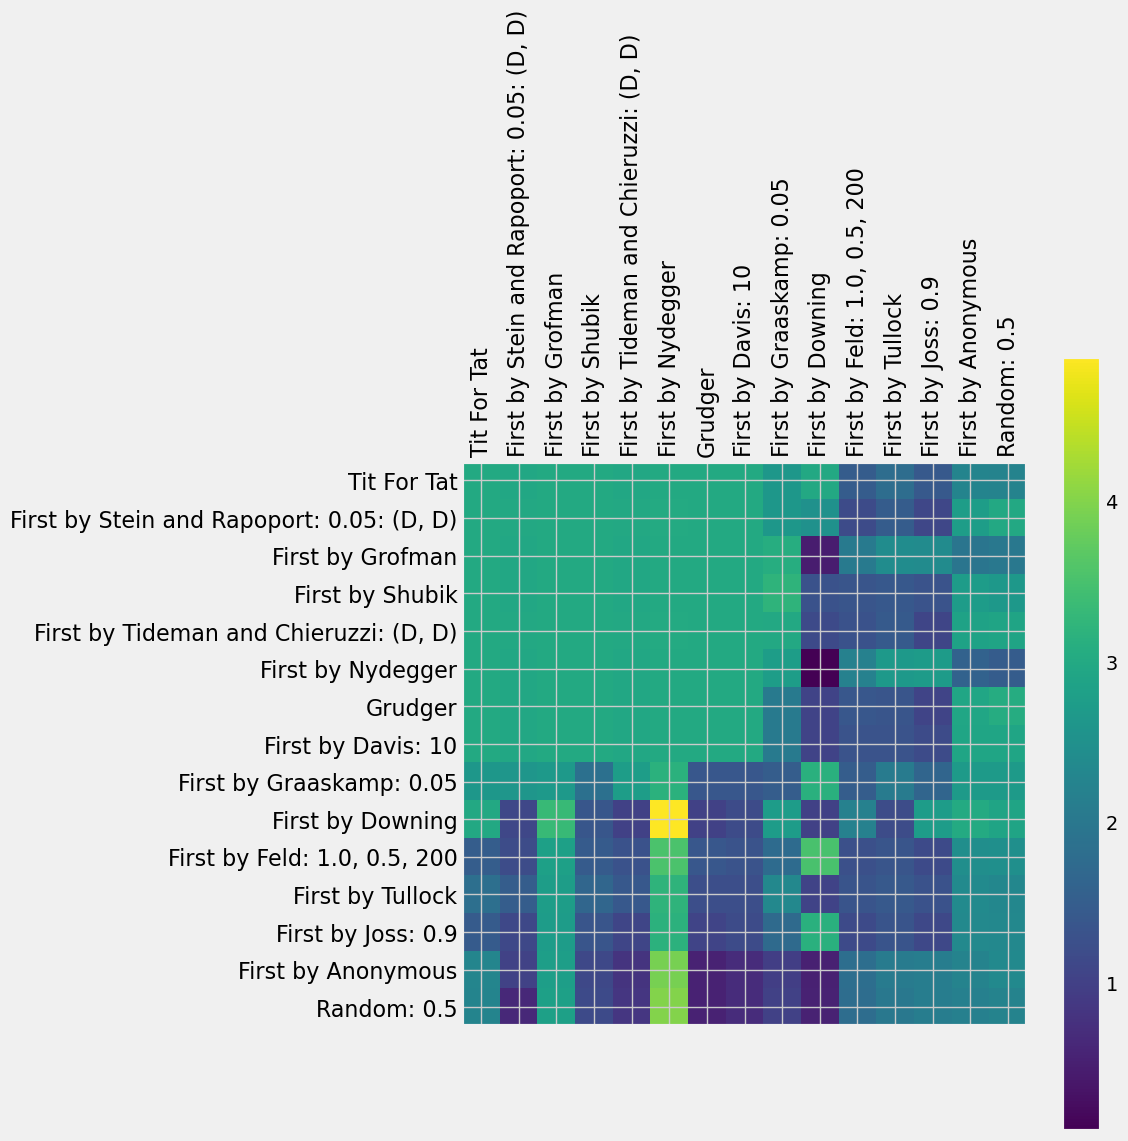

In [24]:
p = plot.payoff()
p.show()

Note that how well each strategy performed is a function of the other strategies in the tournament.

## Populations playing iterated prisoner's dilemmas

We can also simulate an [ecological system](https://axelrod.readthedocs.io/en/stable/how-to/run_axelrods_ecological_variant.html)

In [25]:
eco = axl.Ecosystem(results1)
eco.reproduce(100)

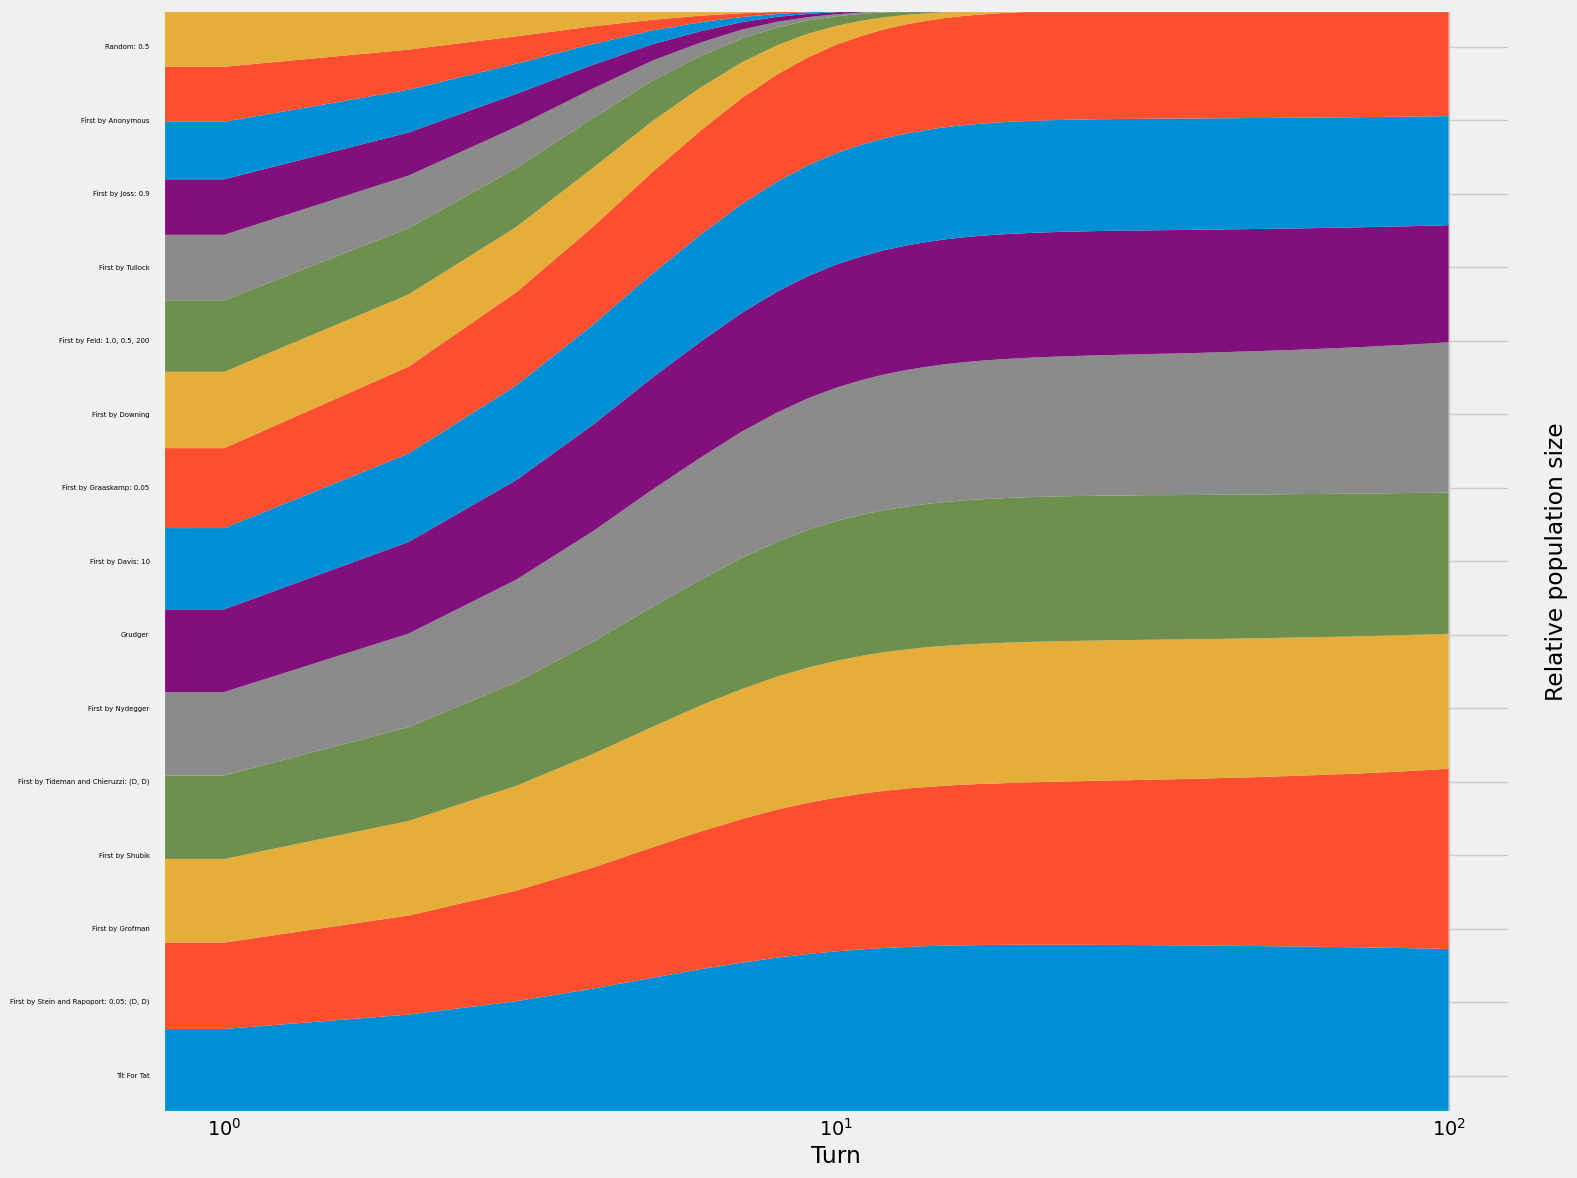

In [26]:
fig, ax = plt.subplots(figsize=(16,12))

plot = axl.Plot(results1)
p = plot.stackplot(eco, ax=ax)
p.show();